# Cleaning US Census Data

## Introduction

This project analyzes data from the Census Bureau, an agency of the U.S. Federal Statistical System responsible for collecting census data. The goal of this project is to create interesting visualizations and insights from census data after cleaning it.

#### Data sources:

The csv files analyzed was provided by Codecademy.

## Scoping

- Describe the characteristics of the data.
    
- Data Cleaning and Wrangling

- Visualize/Analyze Data to answer some questions:
    - Which of the states has the highest/least average income?
    - What is the total number of men vs. women accounted for in this data?
    - Which of the states has the highest population of women?
    - What is the distribution of race across all 51 states?

## Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<br>

## Load and Inspect Data

There are ten csv files provided. These ten files have the same column names that contain similar values. Importing and using the glob module, all the files are concatenated into one dataframe, us_census.


### Data Characteristics:

us_census has 60 rows and 10 columns. The columns in the dataset include:

- **State:** States in the United States of America
- **TotalPop:** Number of population per state
- **Hispanic:** Percentage of the Hispanic people per state
- **White:** Percentage of the White people per state
- **Black:** Percentage of the Black people per state
- **Native:** Percentage of the Native people per state
- **Asian:** Percentage of the Asian people per state
- **Pacific:** Percentage of the Pacific people per state
- **Income:** Average income earned per state
- **GenderPop:** Men - Women Population per state

The us_census contain data on the number of people (by race & by gender(Men & Women)) and their average Income in 51 unique states.

There are 5 null values in the Pacific column and no null values in the other columns.

There are 9 duplicates in the us_census dataset, this does makes sense as 51 and not 60 states are expected in the census data. The 51st state in this dataset is 'Puerto Rico'. Puerto Rico became a U.S. territory in 1898 and has been included as part of U.S. census since 1910.

In [2]:
#load and concat the data
files = glob.glob('states*.csv')

states_list = []
for filename in files:
    data = pd.read_csv(filename)
    states_list.append(data)
    
us_census = pd.concat(states_list)

In [3]:
#inspect the data
us_census = us_census.drop(columns=['Unnamed: 0'])
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"$46,296.81",2322409M_2455167F
2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"$51,805.41",423477M_419713F
3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"$47,328.08",3167756M_3331859F
4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,"$55,874.52",13171316M_13367298F


In [4]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      60 non-null     object
 1   TotalPop   60 non-null     int64 
 2   Hispanic   60 non-null     object
 3   White      60 non-null     object
 4   Black      60 non-null     object
 5   Native     60 non-null     object
 6   Asian      60 non-null     object
 7   Pacific    55 non-null     object
 8   Income     60 non-null     object
 9   GenderPop  60 non-null     object
dtypes: int64(1), object(9)
memory usage: 5.2+ KB


In [5]:
us_census.State.unique()

array(['Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California'], dtype=object)

In [6]:
us_census[us_census.duplicated()]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Utah,2903379,13.47%,79.41%,1.02%,1.08%,2.20%,0.83%,"$63,488.92",1459229M_1444150F
0,Missouri,6045448,4.04%,77.51%,14.12%,0.36%,1.62%,0.10%,"$49,763.99",2964003M_3081445F
5,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
0,New Jersey,8904413,18.75%,56.49%,14.39%,0.12%,8.16%,0.03%,"$76,581.08",4343027M_4561386F
5,Ohio,11575977,3.67%,75.90%,16.21%,0.17%,1.62%,0.02%,"$49,655.25",5662893M_5913084F
0,Iowa,3093526,5.30%,87.72%,3.26%,0.29%,1.70%,0.06%,"$53,017.75",1534595M_1558931F
5,Maryland,5930538,8.47%,52.68%,30.68%,0.20%,5.33%,0.04%,"$78,765.40",2872643M_F
5,Georgia,10006693,8.42%,54.29%,32.09%,0.19%,3.10%,0.05%,"$50,811.08",4883331M_5123362F
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F


<br>

## Data Cleaning and Wrangling

First, duplicates are dropped. Then, the race population columns are converted into numeric datatype by stripping off the '%' sign and applying pd.to_numeric. The GenderPop is splitted into MenPop and WomenPop columns using the str.split and strip methods to get needed values. 

**Regex to the Rescue:** The income column is converted to numeric datatype using Regex to remove the '$' sign.

**Missing values:** After confirming that the TotalPop column is a list containing the sum of men and women population in GenderPop, the WomenPop column missing values were handled by subtracting the MenPop Column from the TotalPop column. This step also converted WomenPop column from float to int.
The Pacific column had missing values that could not be replaced with random values because of the sensitivity of the data, therefore, the 'UnderRepresented' column was created instead to account for the Pacific people and other races that were not represented in the dataset.

After cleaning and wrangling, there are 51 rows and 11 columns in the us_census dataset:

- **State:** States in the United States of America
- **TotalPop:** Number of population per state
- **Hispanic:** Percentage of the Hispanic people per state
- **White:** Percentage of the White people per state
- **Black:** Percentage of the Black people per state
- **Native:** Percentage of the Native people per state
- **Asian:** Percentage of the Asian people per state
- **Pacific:** Percentage of the Pacific people per state
- **Income:** Average income earned per state
- **MenPop:** Men Population per state
- **MenPop:** Women Population per state

In [7]:
#drop duplicates
us_census = us_census.drop_duplicates()

In [8]:
us_census.reset_index(inplace=True, drop=True)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"$46,296.81",2322409M_2455167F
2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"$51,805.41",423477M_419713F
3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"$47,328.08",3167756M_3331859F
4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,"$55,874.52",13171316M_13367298F


In [9]:
#convert race columns into numerical datatypes
us_census.Hispanic = us_census['Hispanic'].str[:-1]
us_census['Hispanic'] = pd.to_numeric(us_census['Hispanic'])
print(us_census.Hispanic.head(2))

us_census.White = us_census['White'].str[:-1]
us_census['White'] = pd.to_numeric(us_census['White'])
print(us_census.White.head(2))

us_census.Black = us_census['Black'].str[:-1]
us_census['Black'] = pd.to_numeric(us_census['Black'])
print(us_census.Black.head(2))

us_census.Native = us_census['Native'].str[:-1]
us_census['Native'] = pd.to_numeric(us_census['Native'])
print(us_census.Native.head(2))

us_census.Asian = us_census['Asian'].str[:-1]
us_census['Asian'] = pd.to_numeric(us_census['Asian'])
print(us_census.Asian.head(2))

0    13.36
1     5.06
Name: Hispanic, dtype: float64
0    74.33
1    62.89
Name: White, dtype: float64
0     5.68
1    28.75
Name: Black, dtype: float64
0    0.35
1    0.29
Name: Native, dtype: float64
0    3.25
1    1.25
Name: Asian, dtype: float64


In [10]:
#split GenderPop column into MenPop and WomenPop columns
GenderPop_split = us_census['GenderPop'].str.split('_')
us_census['MenPop'] = GenderPop_split.str.get(0)
us_census['WomenPop'] = GenderPop_split.str.get(1)

#convert both columns into numerical datatypes
us_census.MenPop = us_census['MenPop'].str[:-1]
us_census['MenPop'] = pd.to_numeric(us_census['MenPop'])
us_census.WomenPop = us_census['WomenPop'].str[:-1]
us_census['WomenPop'] = pd.to_numeric(us_census['WomenPop'])

print(us_census.MenPop.head())
print(us_census.WomenPop.head())

0      510388
1     2322409
2      423477
3     3167756
4    13171316
Name: MenPop, dtype: int64
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
Name: WomenPop, dtype: float64


In [11]:
#drop the GenderPop column
us_census = us_census.drop(columns=['GenderPop'])

### Regex to the Rescue

In [12]:
#Using Regex, turn Income column into a format that is ready for conversion into a numerical type
us_census.Income = us_census['Income'].replace('[\$,]', '', regex=True)
us_census['Income'] = pd.to_numeric(us_census['Income'])
us_census.Income.head()

0    59125.27
1    46296.81
2    51805.41
3    47328.08
4    55874.52
Name: Income, dtype: float64

### Missing Values

In [13]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     51 non-null     object 
 1   TotalPop  51 non-null     int64  
 2   Hispanic  51 non-null     float64
 3   White     51 non-null     float64
 4   Black     51 non-null     float64
 5   Native    51 non-null     float64
 6   Asian     51 non-null     float64
 7   Pacific   47 non-null     object 
 8   Income    51 non-null     float64
 9   MenPop    51 non-null     int64  
 10  WomenPop  49 non-null     float64
dtypes: float64(7), int64(2), object(2)
memory usage: 4.5+ KB


In [14]:
#Women population column 
us_census['WomenPop'] = us_census['TotalPop'] - us_census['MenPop']
us_census['WomenPop'].head()

0      543273
1     2455167
2      419713
3     3331859
4    13367298
Name: WomenPop, dtype: int64

In [15]:
#drop the Pacific population column
us_census = us_census.drop(columns=['Pacific'])

#create an 'Other' column that accounts for the rest of the population
us_census['UnderRepresented'] = 100 - (us_census['Hispanic'] + us_census['White'] + us_census['Black'] + us_census['Native'] + us_census['Asian'])

In [16]:
#rearrange columns 
us_census = us_census[['State', 
                       'TotalPop', 
                       'Hispanic', 
                       'White', 
                       'Black', 
                       'Native', 
                       'Asian',
                       'UnderRepresented',
                       'Income', 
                       'MenPop', 
                       'WomenPop']]
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,UnderRepresented,Income,MenPop,WomenPop
0,Rhode Island,1053661,13.36,74.33,5.68,0.35,3.25,3.03,59125.27,510388,543273
1,South Carolina,4777576,5.06,62.89,28.75,0.29,1.25,1.76,46296.81,2322409,2455167
2,South Dakota,843190,3.24,82.50,1.42,9.42,1.02,2.40,51805.41,423477,419713
3,Tennessee,6499615,4.72,73.49,18.28,0.23,1.41,1.87,47328.08,3167756,3331859
4,Texas,26538614,38.05,44.69,11.65,0.26,3.67,1.68,55874.52,13171316,13367298


In [17]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             51 non-null     object 
 1   TotalPop          51 non-null     int64  
 2   Hispanic          51 non-null     float64
 3   White             51 non-null     float64
 4   Black             51 non-null     float64
 5   Native            51 non-null     float64
 6   Asian             51 non-null     float64
 7   UnderRepresented  51 non-null     float64
 8   Income            51 non-null     float64
 9   MenPop            51 non-null     int64  
 10  WomenPop          51 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 4.5+ KB


<br>

## Data Visualization

### Income 

Most of the states fall between an average income of 45,000 to 70,000. Maryland records the highest average in income at 78,765.4 USD while Puerto Rico records the lowest at 20,720.54 USD.

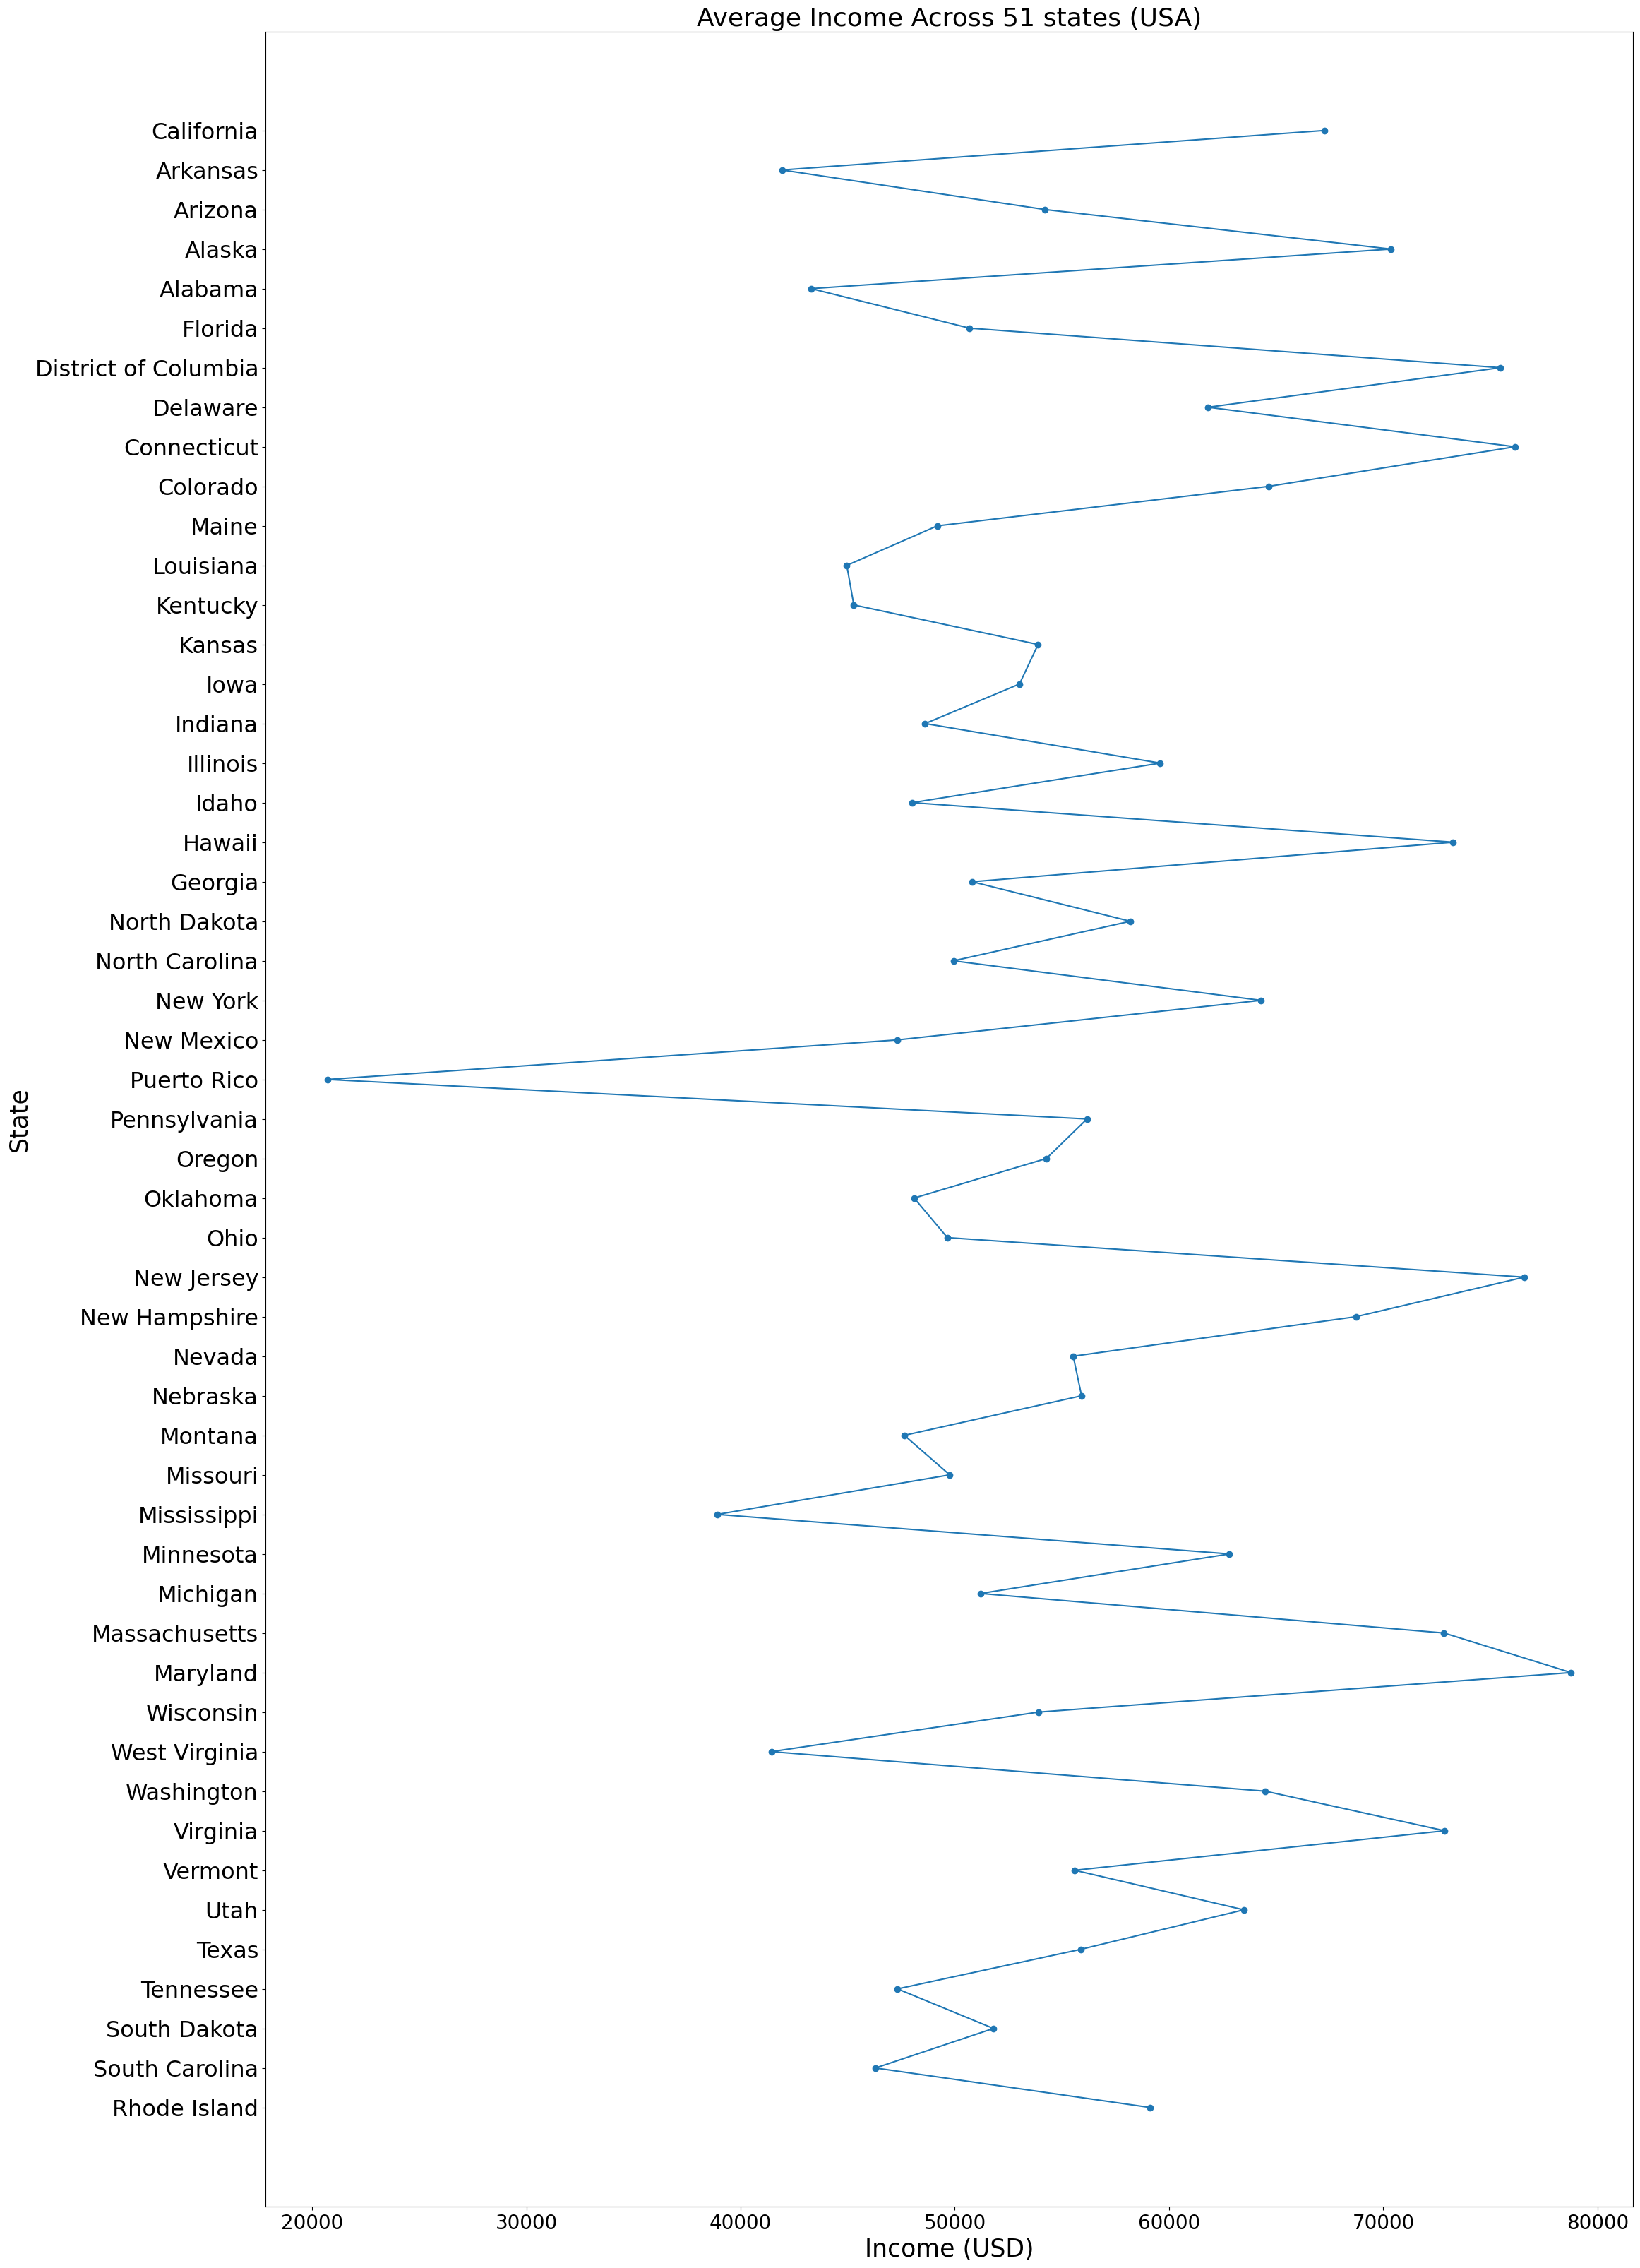

<Figure size 600x600 with 0 Axes>

In [18]:
plt.figure(figsize=(25,40))
plt.plot(us_census['Income'], us_census['State'], marker = 'o')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 23)
plt.title('Average Income Across 51 states (USA)', fontsize = 26)
plt.xlabel('Income (USD)', fontsize = 25)
plt.ylabel('State', fontsize = 25)
plt.show()
plt.savefig('Average Income Across 51 states (USA).png')

<br>

### Population

As accounted for by the US Census Bureau, there are more than five million more women than men living in the United States of America.

The population of most states fall between 600,000 and 12,000,000. California's population is the highest at 38,421,464, followed by Texas at about 27,000,000. Women account for 19,334,329 of California's population, and about 13,000,000 of Texas' population.

In [19]:
'Men Population in the United States of America, as accounted for by the US Census Bureau: {}'.format(us_census['MenPop'].sum())

'Men Population in the United States of America, as accounted for by the US Census Bureau: 157152579'

In [20]:
'Women Population in the United States of America, as accounted for by the US Census Bureau: {}'.format(us_census['WomenPop'].sum())

'Women Population in the United States of America, as accounted for by the US Census Bureau: 162365836'

In [21]:
us_census['WomenPop'].sum() - us_census['MenPop'].sum()

5213257

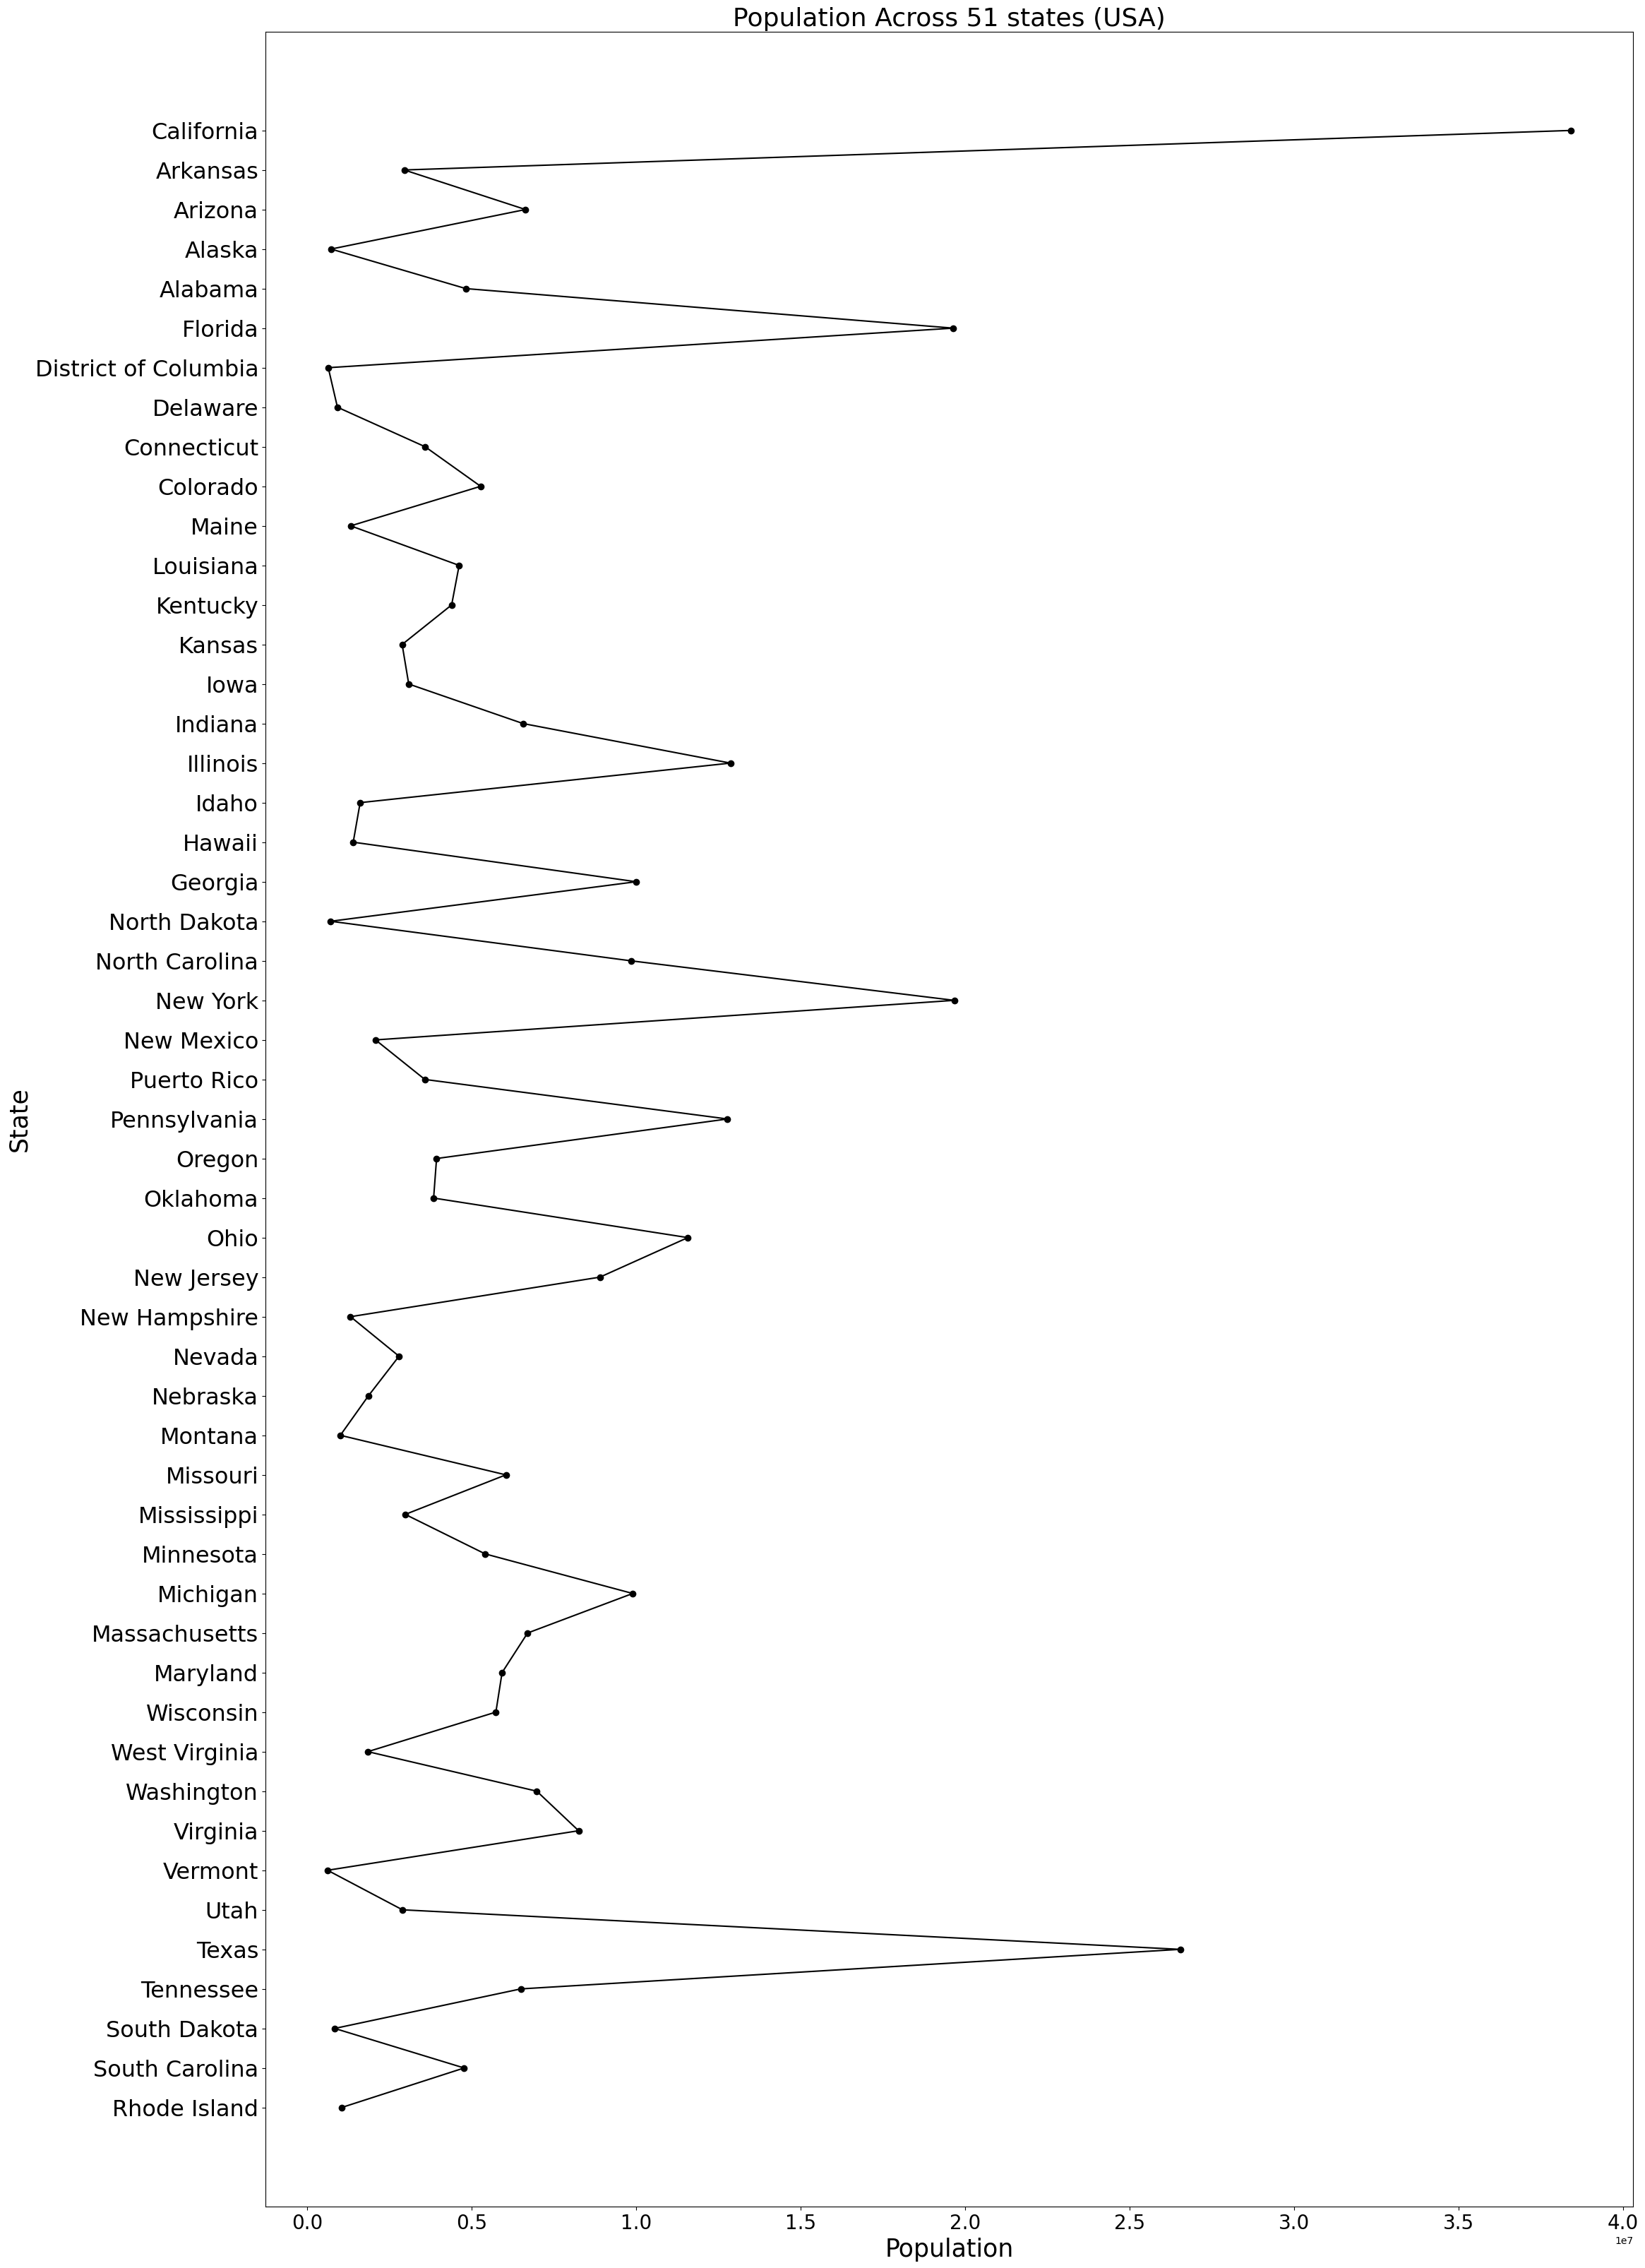

<Figure size 600x600 with 0 Axes>

In [22]:
plt.figure(figsize=(25,40))
plt.plot(us_census['TotalPop'], us_census['State'], color = 'black', marker = 'o')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 23)
plt.title('Population Across 51 states (USA)', fontsize = 26)
plt.xlabel('Population', fontsize = 25)
plt.ylabel('State', fontsize = 25)
plt.show()
plt.savefig('Population Across 51 states (USA).png')

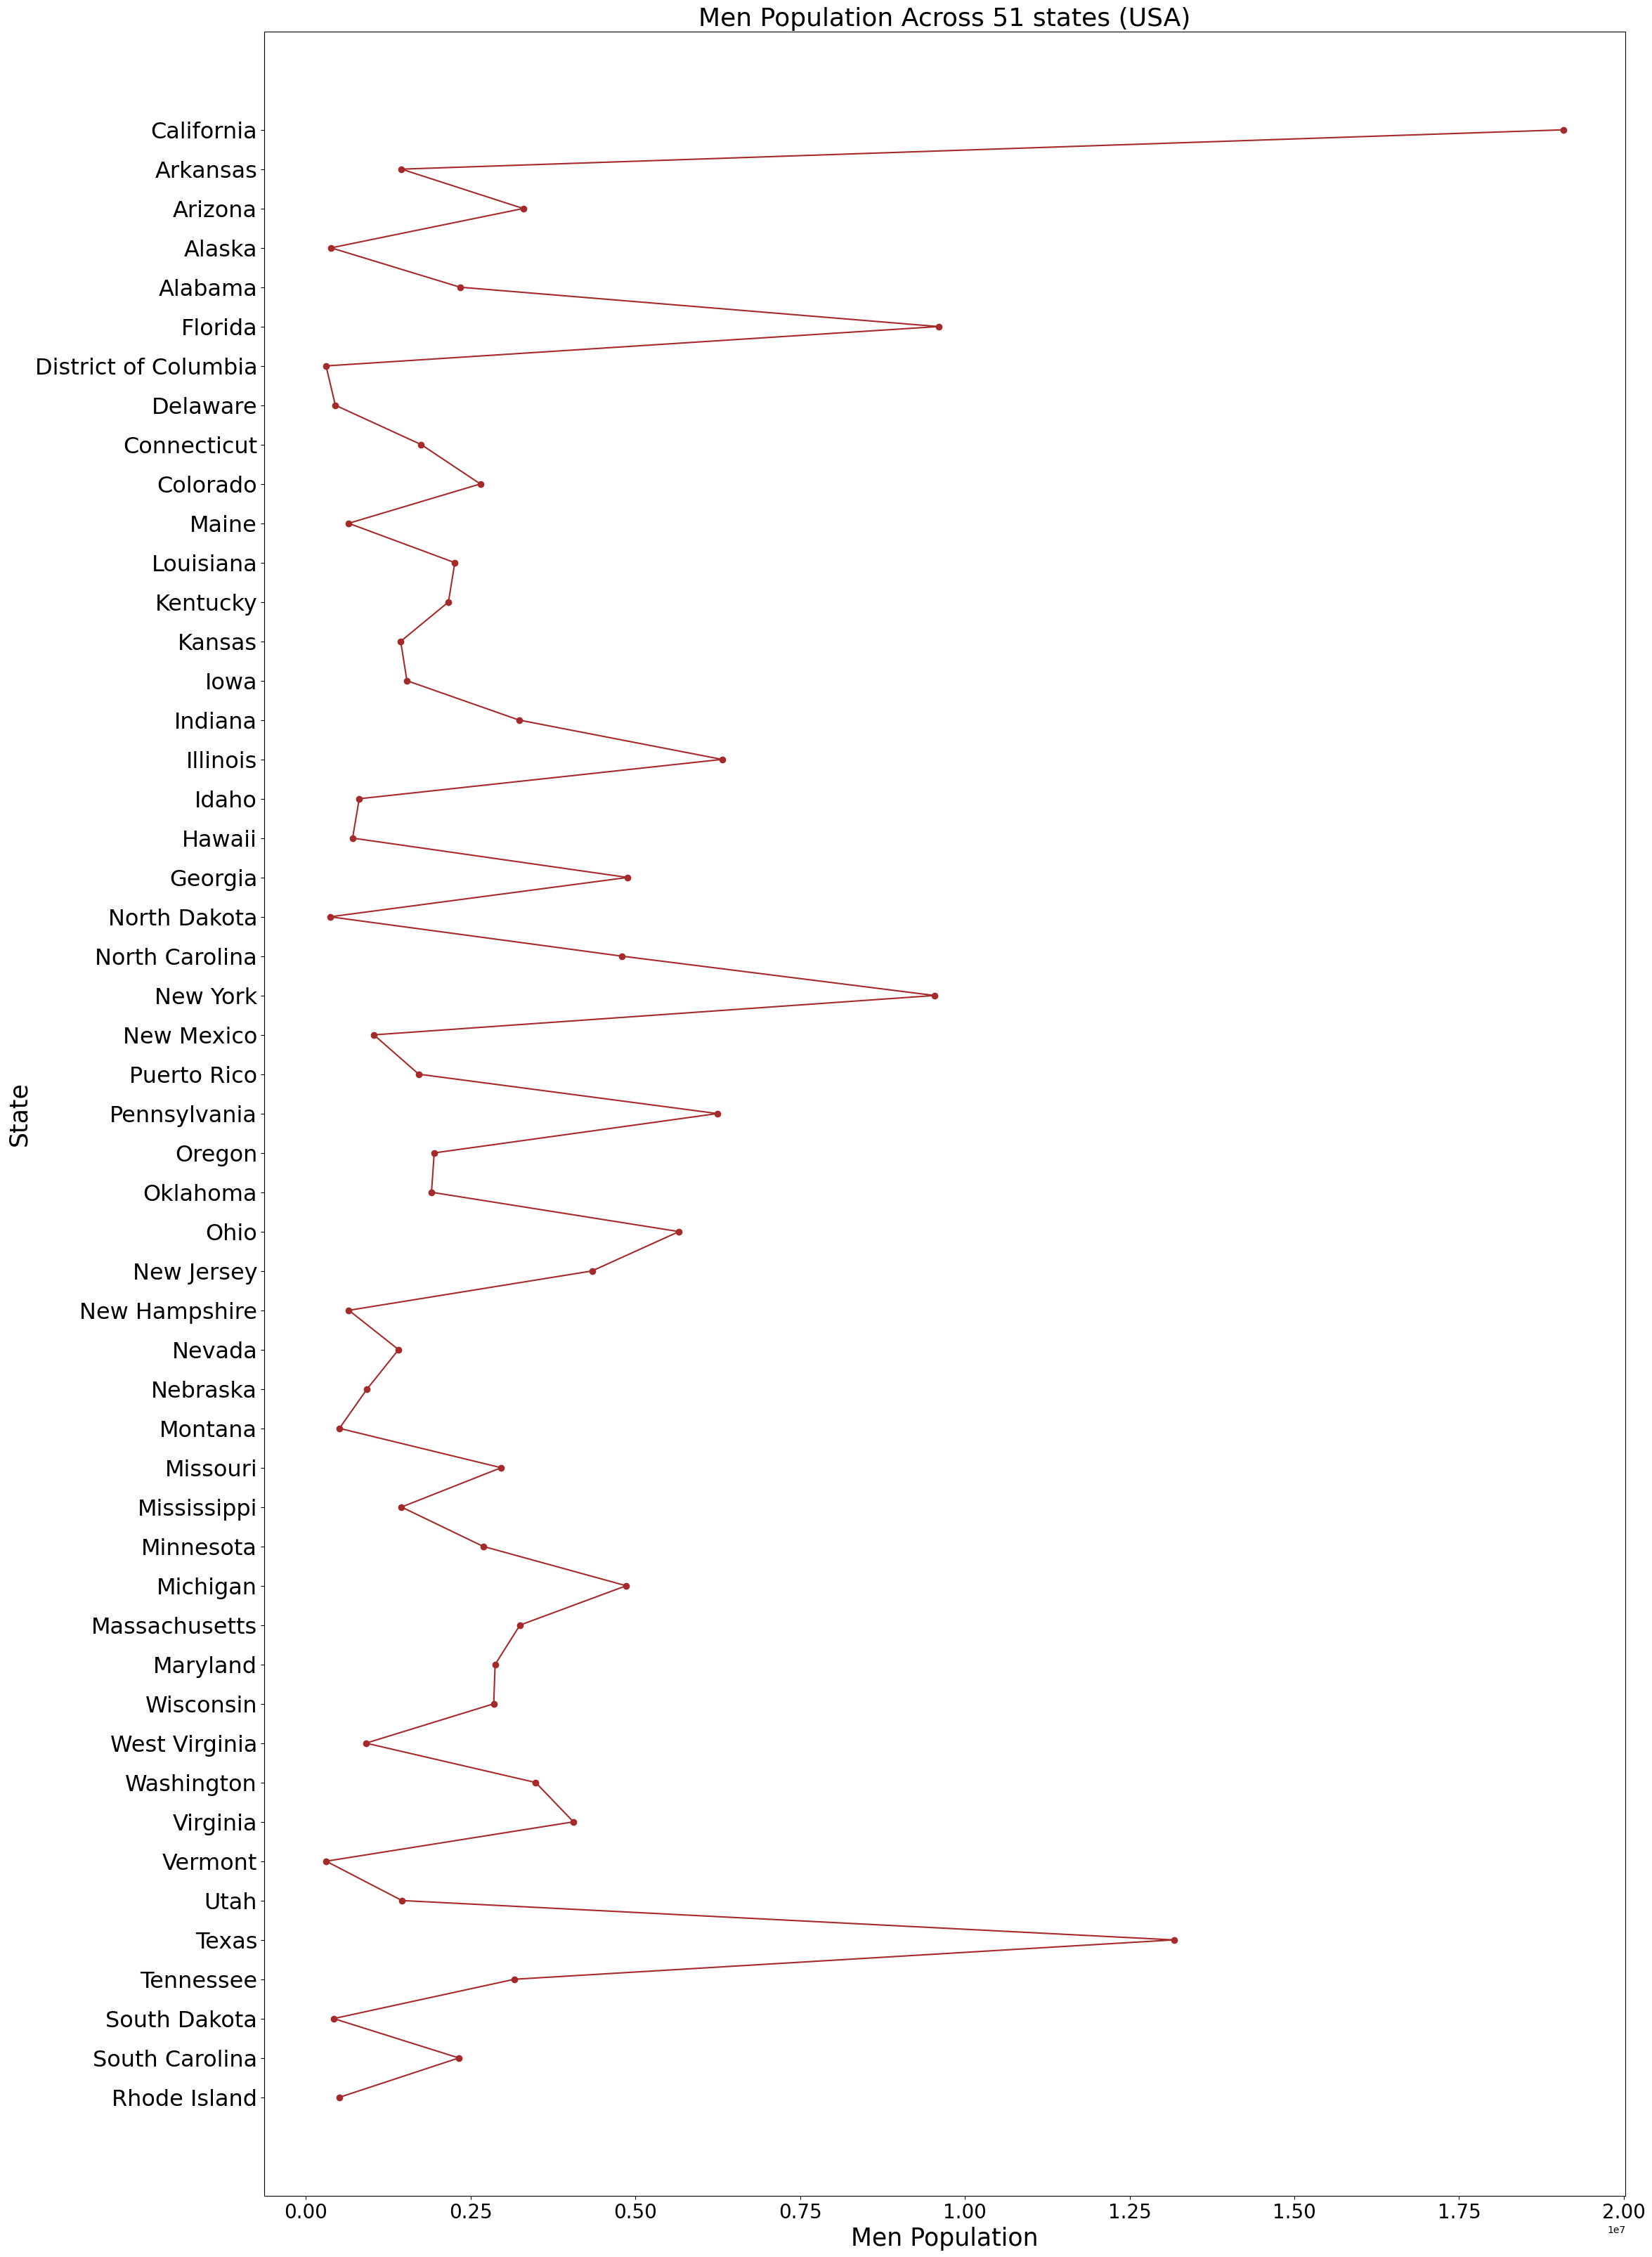

<Figure size 600x600 with 0 Axes>

In [23]:
plt.figure(figsize=(25,40))
plt.plot(us_census['MenPop'], us_census['State'], color = 'brown', marker = 'o')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 23)
plt.title('Men Population Across 51 states (USA)', fontsize = 26)
plt.xlabel('Men Population', fontsize = 25)
plt.ylabel('State', fontsize = 25)
plt.show()
plt.savefig('Men Population Across 51 states (USA).png')

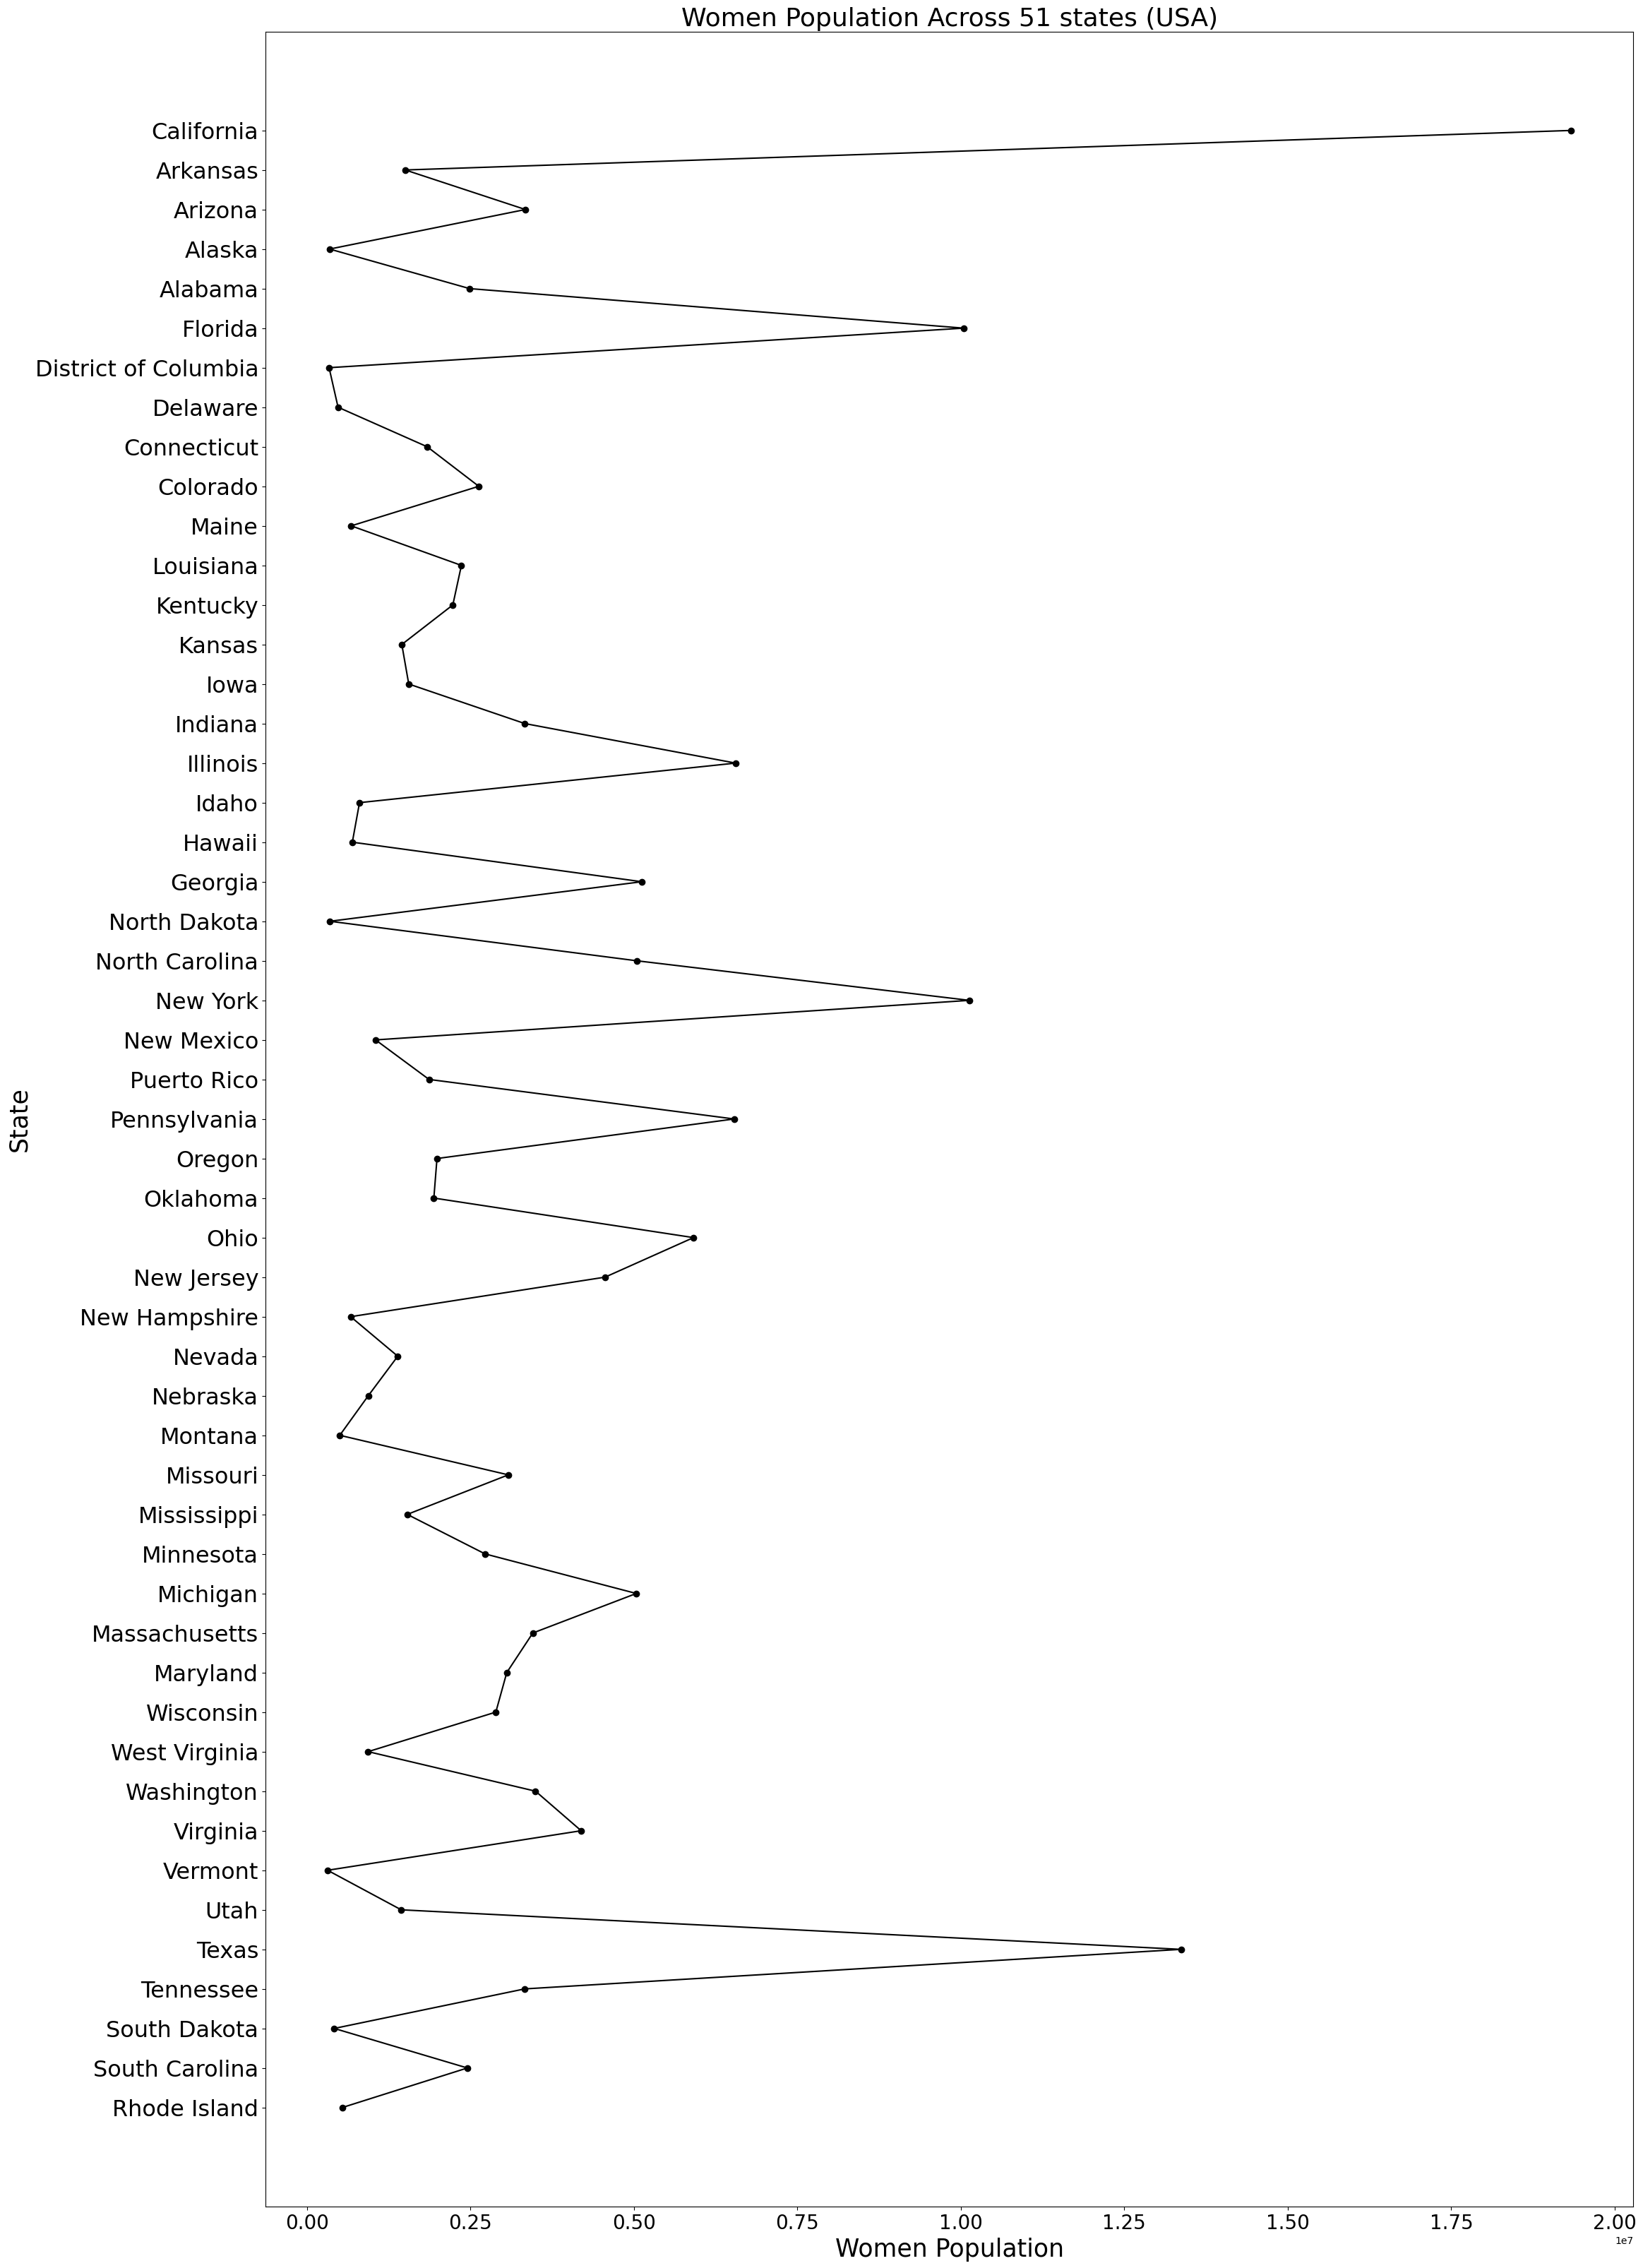

<Figure size 600x600 with 0 Axes>

In [24]:
plt.figure(figsize=(25,40))
plt.plot(us_census['WomenPop'], us_census['State'], color = 'black', marker = 'o')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 23)
plt.title('Women Population Across 51 states (USA)', fontsize = 26)
plt.xlabel('Women Population', fontsize = 25)
plt.ylabel('State', fontsize = 25)
plt.show()
plt.savefig('Women Population Across 51 states (USA).png')

<br>

### Population: By Race

**Stack colors from bottom**: Hispanic -> White -> Black -> Native -> Asian -> UnderRepresented

- Across all states, except Puerto Rico and District of Columbia, there are more people who identify as 'White' than any other race. Vermont has the highest percentage of people who identify as 'White' (93.98%), followed closely by Maine (93.71%). 
- 98% of Puerto Rico's population identify as 'Hispanic', making Puerto Rico the least diverse state/region among all 51 states. 
- More than half of District of Columbia's population identify as 'Black'. 
- People who identify as 'Native' account for less than 1% of most states' population. Across all states, Alaska has the highest percentage of people who identify as 'Native': 16.39%. 
- Hawaii records the highest percentage of the 'UnderRepresented' (27%) as well as people who identify as 'Asian' (36.59%).

**Note**: Zoom in to see state labels on x-axis

In [25]:
plt.figure(figsize=(150, 100))
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 80)

x = range(51)

c_bottom = np.add(us_census['Hispanic'], us_census['White'])
d_bottom = np.add(c_bottom, us_census['Black'])
e_bottom = np.add(d_bottom, us_census['Native'])
f_bottom = np.add(e_bottom, us_census['Asian'])

plt.bar(x, us_census['Hispanic'], align='center', width=0.8)
plt.bar(x, us_census['White'], bottom=us_census['Hispanic'], align='center', width=0.8)
plt.bar(x, us_census['Black'], bottom=c_bottom, align='center', width=0.8)
plt.bar(x, us_census['Native'], bottom=d_bottom, align='center', width=0.8)
plt.bar(x, us_census['Asian'], bottom=e_bottom, align='center', width=0.8)
plt.bar(x, us_census['UnderRepresented'], bottom=f_bottom, align='center', width=0.8)

ax = plt.subplot()
ax.set_xticks(range(len(us_census['State'])))
ax.set_xticklabels(us_census['State'])

plt.title('Race Distribution Across 51 states (USA)', fontsize = 120)
plt.xlabel('State', fontsize = 90)
plt.ylabel('Percentage of Population', fontsize = 100)
plt.show()
plt.savefig('Race Distribution Across 51 states (USA).png')

<Figure size 600x600 with 0 Axes>

<br>

### Recommendation

It would be interesting to analyze data collected to include other features such as Age, Sexuality & Occupation, and how some races may have grown in number out of 'UnderRepresented' in recent census data. 